![example](images/director_shot.jpeg)

# Microsoft New Movie Studio Project

**Authors:** Yi Lin
***

## Overview

In light of the burgeoning movie market, Microsoft intends to establish a new movie studio. As a start-up, it's crucial to make a favorable impression with a well-received film that is also profitable, ensuring the company's sustained growth. How to make a successful movie? This problem can be splitted into 3 smaller questions:

1. Which genre(s) should be chosen?
2. What is the budget range?
3. When is the best time to release the movie?

To answer the questions, the project needs to find out:

1. Which genre of movies tends to receive higher ratings?
2. Which genre of movies tends to offer a higher return on investment (ROI)?
3. What is the budget range for great ROI?
4. Does the release time of a movie impact its gross? If so, in which month are gross typically higher?

To address the above questions, this project will collate and analyze movie-related data from 2011 to 2019, focusing on:

1. The correlation between movie genres and ratings.
2. The relationship between movie gross performance and release time.
3. The interplay among movie genre, ROI, and production budget.

Since Microsoft has a large consumer base in worldwide, so its movie should also target the whole world. In this case, not only US domestic market gross but also worldwide market gross needs to be considered.

## Conclusion: 

The top 5 tier of genres with high raiting and great ROI are:
1. Drama, Fantasy
2. Family
3. Musical, Documentary, Animation, Comedy
4. History, Action, Romance
5. Sport

We suggest that Microsoft's new movie can be selected from the gernes above.

The months that generally yield higher gross are May, June, July, November, and December (in order). We recommend that Microsoft set its movie release time in May, June, or July.

The budget of movies with the ROIs higher than benchmark (28% - 45%) are likely to be in the range of 10,000,000 to 32,000,000. We suggest Microsoft set the budget within this range.

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
ls

 Volume in drive C is Windows-SSD
 Volume Serial Number is BE39-E0A5

 Directory of C:\Users\lytoy\Downloads\Project 1

10/08/2023  12:47 AM    <DIR>          .
10/08/2023  05:50 PM    <DIR>          ..
07/08/2023  06:10 PM               134 .canvas
07/08/2023  06:10 PM                75 .gitignore
10/08/2023  12:45 AM    <DIR>          .ipynb_checkpoints
07/08/2023  01:10 AM    <DIR>          Assistance
07/08/2023  06:10 PM             1,809 CONTRIBUTING.md
10/08/2023  12:47 AM            34,828 dsc-phase1-project-template-Yi Lin.ipynb
07/08/2023  06:10 PM             1,350 LICENSE.md
07/08/2023  06:10 PM           313,091 Project 1  - Microsoft new movie studio Yi Lin.pdf
07/08/2023  06:10 PM             4,611 README.md
10/08/2023  05:46 PM    <DIR>          zippedData
               7 File(s)        355,898 bytes
               5 Dir(s)  236,625,494,016 bytes free


# Import and understand the data

In [3]:
df_movieinfo = pd.read_csv(r'zippedData\imdb.title.basics.csv.gz')
dfimdb_rating = pd.read_csv(r'zippedData\imdb.title.ratings.csv.gz')
dfbudget = pd.read_csv(r'zippedData\tn.movie_budgets.csv.gz')

In [4]:
#Check columns to understand the data and see if there is null
df_movieinfo.info()
df_movieinfo
dfimdb_rating.info()
dfimdb_rating
dfbudget.info()
dfbudget

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


_______________________________________________________________________________________________________________

# Q1: What are the movie genres should Microsft choose? 

The top movie genres should be popular and with the highest ratings, which includes two aguments for analysis: number of votes and rating. There is a possibility that audience preferrence changes, so we will analyse last 9-year data but seperated into 3 periods and see if the changes happen.

_______________________________________________________________________________________________________________

In [5]:
#merge movie_info and rating data together
df_info_rating = dfimdb_rating.merge(df_movieinfo, on='tconst', how='left')
df_info_rating.info()
df_info_rating

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73856 non-null  object 
 1   averagerating    73856 non-null  float64
 2   numvotes         73856 non-null  int64  
 3   primary_title    73856 non-null  object 
 4   original_title   73856 non-null  object 
 5   start_year       73856 non-null  int64  
 6   runtime_minutes  66236 non-null  float64
 7   genres           73052 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 5.1+ MB


,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"
...,...,...,...,...,...,...,...,...
73851,tt9805820,8.1,25,Caisa,Caisa,2018,84.0,Documentary
73852,tt9844256,7.5,24,Code Geass: Lelouch of the Rebellion - Glorifi...,Code Geass: Lelouch of the Rebellion Episode III,2018,120.0,"Action,Animation,Sci-Fi"
73853,tt9851050,4.7,14,Sisters,Sisters,2019,NaN,"Action,Drama"
73854,tt9886934,7.0,5,The Projectionist,The Projectionist,2019,81.0,Documentary


In [6]:
# Filter the data from 2011 to 2013 (3-year period)
df_info_rating2013 = df_info_rating[(df_info_rating['start_year'] >= 2011) & (df_info_rating['start_year'] <= 2013)][['averagerating', 'genres', 'numvotes', 'start_year']]

# The vote number lower than 500, indicating that the movie is not popular amoung audience
df_info_rating2013a = df_info_rating2013[(df_info_rating2013['numvotes'] >= 500)] 

# Movie list from 2011 to 2013 with more than 500 votes 
df_info_rating2013a.head(10)

,averagerating,genres,numvotes,start_year
7,6.4,"Drama,Thriller",571,2011
10,5.1,Comedy,8296,2013
12,7.0,"Adventure,Animation,Drama",5494,2013
16,7.6,"Biography,Drama,Sport",326657,2011
19,7.4,"Action,Adventure,Thriller",428142,2011
20,7.2,"Action,Comedy,Crime",477771,2012
29,6.1,"Comedy,Crime,Drama",6688,2012
52,5.4,Drama,4302,2012
54,5.4,"Adventure,Family,Fantasy",5257,2013
57,5.4,"Action,Comedy,Crime",6220,2011


In [7]:
# Caculate the averagerating for each genre and find out the top 10
df_grouped2013 = df_info_rating2013a.groupby('genres')['averagerating'].mean()
df_sorted2013 = df_grouped2013.sort_values(ascending=False)
df_sorted2013a = df_sorted2013.reset_index()
df_sorted2013a.columns = ['genres', 'averagerating']
df_sorted2013a.head(10)

# Preparation for barh chart creation
df_sorted2013a.head(10).set_index('genres', inplace=True)
df2013b = df_sorted2013a.head(10)
df2013c = df2013b.sort_values(by='averagerating')

# Check the final data for visulisation
df2013c

,genres,averagerating
8,"Animation,Drama,History",7.80
9,"Action,Documentary,Sport",7.80
7,"Documentary,Drama,History",7.85
6,"Drama,Family,Musical",7.90
5,"Fantasy,Musical,Sci-Fi",7.90
3,"Animation,Fantasy,Mystery",8.00
4,"Comedy,Drama,History",8.00
2,"Documentary,Romance",8.10
1,"Documentary,Family",8.10
0,"Adventure,Documentary,Sport",8.30


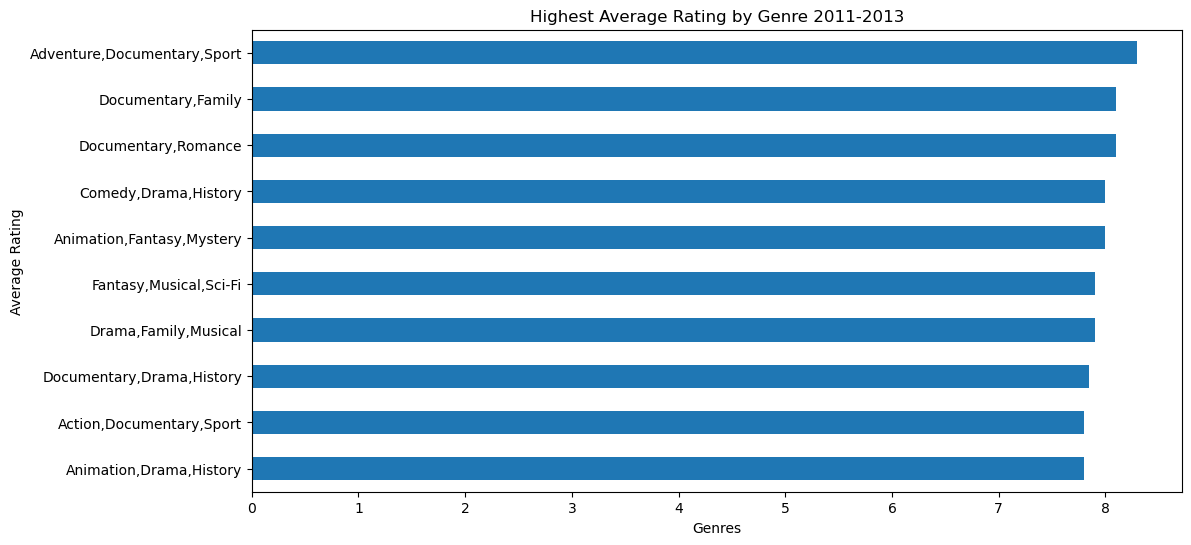

In [8]:
#Create barh chart
df2013c.set_index('genres', inplace=True)
df2013c['averagerating'].plot(kind='barh', figsize=(12, 6))

plt.title('Highest Average Rating by Genre 2011-2013')
plt.xlabel('Genres')
plt.ylabel('Average Rating')
plt.show()

#repeat the same process for the period of 2014 to 2016, 2017 to 2019

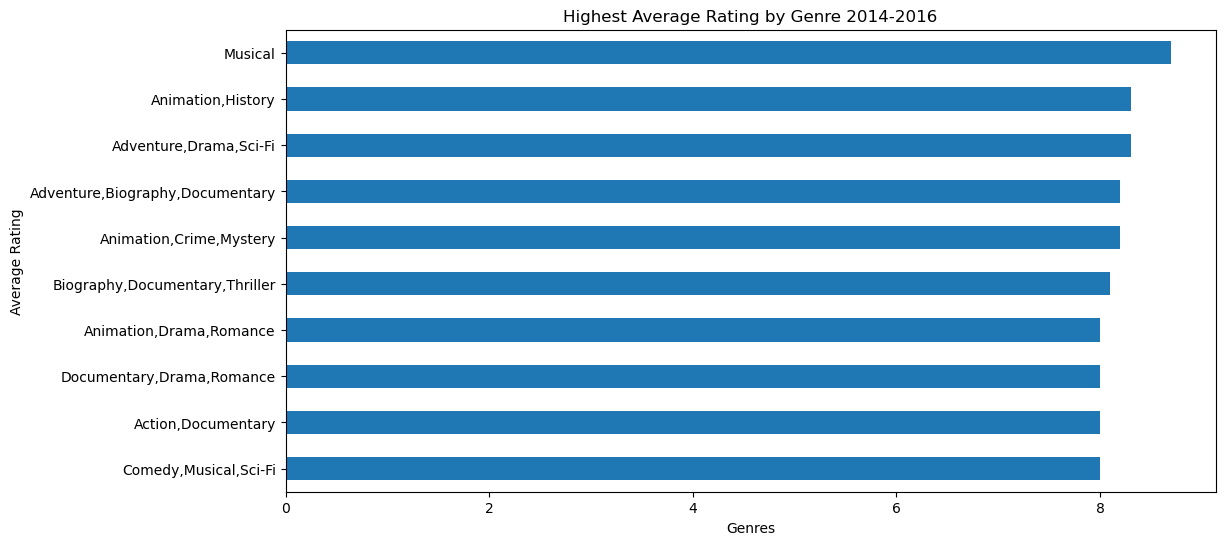

In [9]:
df_info_rating2016 = df_info_rating[(df_info_rating['start_year'] >= 2014) & (df_info_rating['start_year'] <= 2016)][['averagerating', 'genres', 'numvotes', 'start_year']]
df_info_rating2016a = df_info_rating2016[(df_info_rating2016['numvotes'] >= 500)] 

df_grouped2016 = df_info_rating2016a.groupby('genres')['averagerating'].mean()
df_sorted2016 = df_grouped2016.sort_values(ascending=False)
df_sorted2016a = df_sorted2016.reset_index()
df_sorted2016a.columns = ['genres', 'averagerating']
df_sorted2016a.head(10)

df_sorted2016a.head(10).set_index('genres', inplace=True)
df2016b = df_sorted2016a.head(10)
df2016c = df2016b.sort_values(by='averagerating')
df2016c

df2016c.set_index('genres', inplace=True)
df2016c['averagerating'].plot(kind='barh', figsize=(12, 6))

plt.title('Highest Average Rating by Genre 2014-2016')
plt.xlabel('Genres')
plt.ylabel('Average Rating')
plt.show()

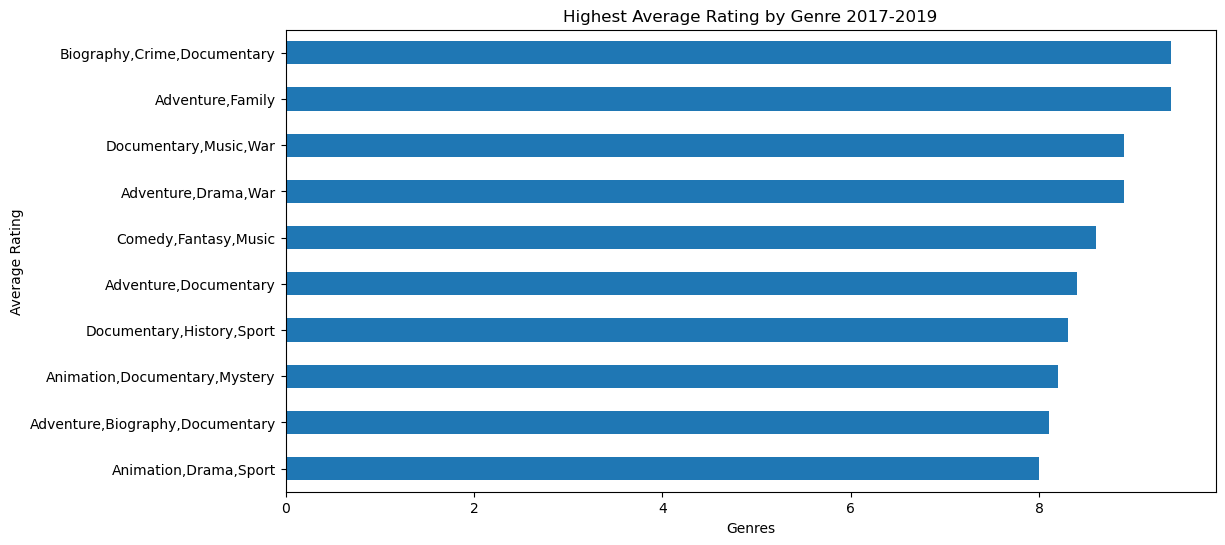

In [10]:
df_info_rating2019 = df_info_rating[(df_info_rating['start_year'] >= 2017) & (df_info_rating['start_year'] <= 2019)][['averagerating', 'genres', 'numvotes', 'start_year']]
df_info_rating2019a = df_info_rating2019[(df_info_rating2019['numvotes'] >= 500)] 

df_grouped2019 = df_info_rating2019a.groupby('genres')['averagerating'].mean()
df_sorted2019 = df_grouped2019.sort_values(ascending=False)
df_sorted2019a = df_sorted2019.reset_index()
df_sorted2019a.columns = ['genres', 'averagerating']
df_sorted2019a.head(10)

df_sorted2019a.head(10).set_index('genres', inplace=True)
df2019b = df_sorted2019a.head(10)
df2019c = df2019b.sort_values(by='averagerating')
df2019c

df2019c.set_index('genres', inplace=True)
df2019c['averagerating'].plot(kind='barh', figsize=(12, 6))

plt.title('Highest Average Rating by Genre 2017-2019')
plt.xlabel('Genres')
plt.ylabel('Average Rating')
plt.show()

# Conclusion

The top 10 genres for the three periods are the same, indicating that these genres have been constantly popular in almost a decade and audience seems to have no major changes regarding the genres. 

It is concluded that from 2011 to 2019, the genres that the majority of audiences favor remained fairly consistent. 
The top 10 genres with the highest ratings are: 
1. Adventure-Family
2. Crime-Documentary
3. Adventure-War
4. War-Music-Documentary
5. Fantasy-Music-Drama
6. Adventure-Documentary
7. History-Sport-Documentary
8. Mystery-Animation-Documentary
9. Biography-Adventure
10. Sport-Animation
We suggest that Microsoft's maiden movie genre be selected from these ten genres, ranked here from highest to lowest rating.

### HOWEVER THIS IS NOT THE FINAL CONCLUSION.

Movie production also needs to consider ROI, so we will compare the list above with the list of best ROI to find out the genres. 

### Please see the analysis after Q3.



# Q2: What is the best month for movie release?

We will summarise the mean of gross by movie release month and compare the numbers.
_______________________________________________________________________________________________________________

In [11]:
#check the data
dfbudget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [12]:
# Transfer $ format to int64
dfbudget_dg = dfbudget['domestic_gross'].str.replace('[\$,]', '', regex=True).astype('int64')
dfbudget_wg = dfbudget['worldwide_gross'].str.replace('[\$,]', '', regex=True).astype('int64')

# Caculate total gross
dfbudget['total_gross'] = dfbudget_dg + dfbudget_wg

# Extract the month from the release date
dfbudget['month'] = dfbudget['release_date'].str.split(' ', expand=True)[0].astype(str)
dfbudget['month'] = dfbudget['month'].str.strip()

dfbudget # Check the final version

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,month
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",3536852904,Dec
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",1286727750,May
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",192524700,Jun
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",1862019831,May
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",1936903129,Dec
...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0,0,Dec
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495",288977,Apr
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338",2676,Jul
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0,0,Sep


In [13]:
# Calculate the mean of total gross by month
df_moviebesttime = dfbudget.groupby('month')['total_gross'].mean()

# Make the data more readable
df_moviebesttime = pd.DataFrame(df_moviebesttime)
df_moviebesttime = df_moviebesttime.reset_index()
df_moviebesttime.columns = ['month', 'total_gross']
df_moviebesttime

,month,total_gross
0,Apr,8.724866e+07
1,Aug,9.314662e+07
2,Dec,1.477940e+08
3,Feb,1.069592e+08
4,Jan,7.051344e+07
5,Jul,2.016917e+08
6,Jun,2.083509e+08
7,Mar,1.192064e+08
8,May,2.289660e+08
9,Nov,1.939228e+08


In [14]:
# Replace the months by numbers for ranking
df_moviebesttime['month'] = df_moviebesttime['month'].replace({'Jan': '1'})
df_moviebesttime['month'] = df_moviebesttime['month'].replace({'Feb': '2'})
df_moviebesttime['month'] = df_moviebesttime['month'].replace({'Mar': '3'})
df_moviebesttime['month'] = df_moviebesttime['month'].replace({'Apr': '4'})
df_moviebesttime['month'] = df_moviebesttime['month'].replace({'May': '5'})
df_moviebesttime['month'] = df_moviebesttime['month'].replace({'Jun': '6'})
df_moviebesttime['month'] = df_moviebesttime['month'].replace({'Jul': '7'})
df_moviebesttime['month'] = df_moviebesttime['month'].replace({'Aug': '8'})
df_moviebesttime['month'] = df_moviebesttime['month'].replace({'Sep': '9'})
df_moviebesttime['month'] = df_moviebesttime['month'].replace({'Oct': '10'})
df_moviebesttime['month'] = df_moviebesttime['month'].replace({'Nov': '11'})
df_moviebesttime['month'] = df_moviebesttime['month'].replace({'Dec': '12'})
df_moviebesttime['month'] = df_moviebesttime['month'].astype(int)
df_moviebesttime = df_moviebesttime.sort_values('month')
df_moviebesttime

,month,total_gross
4,1,7.051344e+07
3,2,1.069592e+08
7,3,1.192064e+08
0,4,8.724866e+07
8,5,2.289660e+08
6,6,2.083509e+08
5,7,2.016917e+08
1,8,9.314662e+07
11,9,6.984357e+07
10,10,7.388806e+07


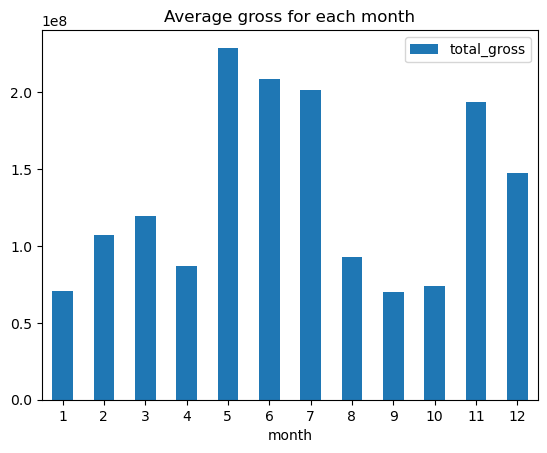

In [16]:
#Crreate the bar chart to compare the gross for each month
df_moviebesttime.plot.bar(x='month', y='total_gross', title='Average gross for each month')
plt.xticks(rotation=0)
plt.show()


# Conclusion

The months that generally yield higher box office revenues are May, June, July, November, and December (in order). We recommend that Microsoft time its movie releases for May, June, or July.

# Q3: Which genres has the highest ROI rate? And what are the common budget for great ROI?

In [17]:
dfbudget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,month
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",3536852904,Dec
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",1286727750,May
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",192524700,Jun
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",1862019831,May
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",1936903129,Dec
...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0,0,Dec
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495",288977,Apr
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338",2676,Jul
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0,0,Sep


In [20]:
duplicates = df_movieinfo.duplicated(subset=['primary_title'])
print(duplicates)

0         False
1         False
2         False
3         False
4         False
          ...  
146139    False
146140    False
146141    False
146142    False
146143    False
Length: 146144, dtype: bool


In [21]:
df_genre_ROI = dfbudget.merge(df_movieinfo[['primary_title', 'genres']], 
                           left_on='movie', 
                           right_on='primary_title', 
                           how='inner')
df_genre_ROI

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,month,primary_title,genres
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",3536852904,Dec,Avatar,Horror
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",1286727750,May,Pirates of the Caribbean: On Stranger Tides,"Action,Adventure,Fantasy"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",192524700,Jun,Dark Phoenix,"Action,Adventure,Sci-Fi"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",1862019831,May,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi"
4,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",2726949682,Apr,Avengers: Infinity War,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...,...,...,...,...,...
3810,68,"Jul 6, 2001",Cure,"$10,000","$94,596","$94,596",189192,Jul,Cure,NaN
3811,70,"Apr 1, 1996",Bang,"$10,000",$527,$527,1054,Apr,Bang,NaN
3812,73,"Jan 13, 2012",Newlyweds,"$9,000","$4,584","$4,584",9168,Jan,Newlyweds,"Comedy,Drama"
3813,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0,0,Dec,Red 11,"Horror,Sci-Fi,Thriller"


In [22]:
df_genre_ROI['production_budget'] = df_genre_ROI['production_budget'].str.replace('[\$,]', '', regex=True).astype('int64')
df_genre_ROI['ROI'] = (df_genre_ROI['total_gross'] - df_genre_ROI['production_budget'])/df_genre_ROI['production_budget']
df_genre_ROI

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,month,primary_title,genres,ROI
0,1,"Dec 18, 2009",Avatar,425000000,"$760,507,625","$2,776,345,279",3536852904,Dec,Avatar,Horror,7.322007
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,"$241,063,875","$1,045,663,875",1286727750,May,Pirates of the Caribbean: On Stranger Tides,"Action,Adventure,Fantasy",2.133774
2,3,"Jun 7, 2019",Dark Phoenix,350000000,"$42,762,350","$149,762,350",192524700,Jun,Dark Phoenix,"Action,Adventure,Sci-Fi",-0.449929
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,"$459,005,868","$1,403,013,963",1862019831,May,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",4.632244
4,7,"Apr 27, 2018",Avengers: Infinity War,300000000,"$678,815,482","$2,048,134,200",2726949682,Apr,Avengers: Infinity War,"Action,Adventure,Sci-Fi",8.089832
...,...,...,...,...,...,...,...,...,...,...,...
3810,68,"Jul 6, 2001",Cure,10000,"$94,596","$94,596",189192,Jul,Cure,NaN,17.919200
3811,70,"Apr 1, 1996",Bang,10000,$527,$527,1054,Apr,Bang,NaN,-0.894600
3812,73,"Jan 13, 2012",Newlyweds,9000,"$4,584","$4,584",9168,Jan,Newlyweds,"Comedy,Drama",0.018667
3813,78,"Dec 31, 2018",Red 11,7000,$0,$0,0,Dec,Red 11,"Horror,Sci-Fi,Thriller",-1.000000


In [23]:
df_genre_ROI_grouped = df_genre_ROI.groupby('genres')[['ROI', 'production_budget']].mean()
df_genre_ROI_grouped

,ROI,production_budget
genres,,
Action,2.192336,3.327935e+07
"Action,Adventure",6.117365,5.369533e+07
"Action,Adventure,Animation",4.531110,1.151471e+08
"Action,Adventure,Biography",2.002105,7.100000e+07
"Action,Adventure,Comedy",4.323851,8.051515e+07
...,...,...
"Sci-Fi,Thriller",4.772796,1.787750e+07
Sport,0.014255,3.066667e+07
Thriller,4.760740,2.592334e+07


In [24]:
# Make the data more readable
df_genre_ROI_grouped = pd.DataFrame(df_genre_ROI_grouped)
df_genre_ROI_grouped = df_genre_ROI_grouped.reset_index()
df_genre_ROI_grouped.columns = ['Genres', 'ROI(%)', 'Budget($)']
df_sorted = df_genre_ROI_grouped.sort_values('ROI(%)', ascending=False)
df_sorted.head(20)

,Genres,ROI(%),Budget($)
133,"Animation,Family",123.277880,3.244000e+06
257,"Drama,Family,Fantasy",62.974088,4.895000e+07
26,"Action,Comedy,Drama",44.105571,1.473750e+07
217,"Crime,Drama,Family",43.981351,2.260000e+07
174,"Comedy,Drama,Fantasy",41.926016,1.008133e+07
326,"Horror,Romance,Thriller",38.010960,3.500000e+06
306,"Family,Fantasy",36.217265,2.364462e+07
134,"Animation,Family,Fantasy",36.217265,2.364462e+07
135,"Animation,Fantasy,Musical",36.217265,2.364462e+07
332,Musical,33.727223,3.053750e+07


The median of the studio-financed movies is 27%, according to New York University's research on 2010. The movies with ROI above 27% can be considered as movies with great ROI.

Source: https://www.stern.nyu.edu/sites/default/files/assets/documents/uat_024304.pdf

In [25]:
df_sorted['ROI(%)'] = df_sorted['ROI(%)'].astype(float)
df_sorted_goodROI = df_sorted[df_sorted['ROI(%)'] > 27]
df_sorted_goodROI

,Genres,ROI(%),Budget($)
133,"Animation,Family",123.277880,3.244000e+06
257,"Drama,Family,Fantasy",62.974088,4.895000e+07
26,"Action,Comedy,Drama",44.105571,1.473750e+07
217,"Crime,Drama,Family",43.981351,2.260000e+07
174,"Comedy,Drama,Fantasy",41.926016,1.008133e+07
326,"Horror,Romance,Thriller",38.010960,3.500000e+06
306,"Family,Fantasy",36.217265,2.364462e+07
134,"Animation,Family,Fantasy",36.217265,2.364462e+07
135,"Animation,Fantasy,Musical",36.217265,2.364462e+07
332,Musical,33.727223,3.053750e+07


C:\Users\lytoy\AppData\Local\Temp\ipykernel_6072\1029368047.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sorted_goodROI['Budget($)'] = df_sorted_goodROI['Budget($)'] / 1e6  # 1e6 = 1,000,000


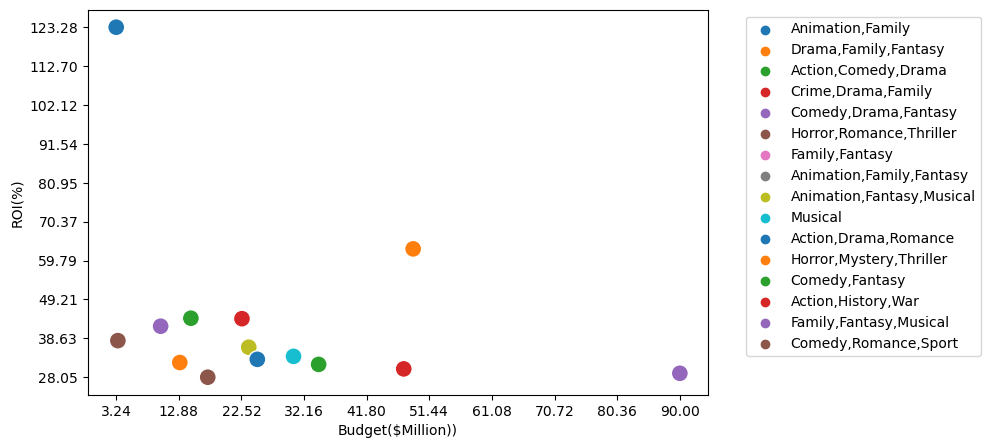

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

df_sorted_goodROI['Budget($)'] = df_sorted_goodROI['Budget($)'] / 1e6  # 1e6 = 1,000,000

plt.figure(figsize=(8, 5))  
sns.scatterplot(data=df_sorted_goodROI, x='Budget($)', y='ROI(%)', hue='Genres', palette='tab10', s=150)

plt.xlabel('Budget($Million))') 
plt.ylabel('ROI(%)')  

plt.xticks(ticks=np.linspace(df_sorted_goodROI['Budget($)'].min(), df_sorted_goodROI['Budget($)'].max(), 10))
plt.yticks(ticks=np.linspace(df_sorted_goodROI['ROI(%)'].min(), df_sorted_goodROI['ROI(%)'].max(), 10))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2)  
plt.show()


## Conclusion: 

Movie genres that have demonstrated good ROI include Family-Animation, Family-Fantasy, Action-Comedy, and Crime. Family-Animation significantly outperforms the other genres in terms of ROI. The remaining high-performing genres have an ROI in the range of 28% to 45%, with budgets generally between 10 million and 32 million. We advise that Microsoft's first film fall within one of these high-performing genres, with a budget set in the 10 to 32 million range.

## Q1 Continue

Compare the list of:
1. The genres with the highest average rating
2. The genres with the ROI over 27%

to find out the genres for Microsoft first movie

In [27]:
# The value in genres contains multiple genres, it has to be splited for analysis
df1 = df_sorted_goodROI['Genres'].str.split(',', expand=True).stack()
df1

133  0    Animation
     1       Family
257  0        Drama
     1       Family
     2      Fantasy
26   0       Action
     1       Comedy
     2        Drama
217  0        Crime
     1        Drama
     2       Family
174  0       Comedy
     1        Drama
     2      Fantasy
326  0       Horror
     1      Romance
     2     Thriller
306  0       Family
     1      Fantasy
134  0    Animation
     1       Family
     2      Fantasy
135  0    Animation
     1      Fantasy
     2      Musical
332  0      Musical
50   0       Action
     1        Drama
     2      Romance
324  0       Horror
     1      Mystery
     2     Thriller
186  0       Comedy
     1      Fantasy
62   0       Action
     1      History
     2          War
308  0       Family
     1      Fantasy
     2      Musical
206  0       Comedy
     1      Romance
     2        Sport
dtype: object

In [28]:
# Since the results are all the same, either of them can be used for comparison
# The value in genres contains multiple genres, it has to be splited for analysis
df2013d = df2013c.reset_index()
df2 = df2013d['genres'].str.split(',', expand=True).stack()
df2

0  0      Animation
   1          Drama
   2        History
1  0         Action
   1    Documentary
   2          Sport
2  0    Documentary
   1          Drama
   2        History
3  0          Drama
   1         Family
   2        Musical
4  0        Fantasy
   1        Musical
   2         Sci-Fi
5  0      Animation
   1        Fantasy
   2        Mystery
6  0         Comedy
   1          Drama
   2        History
7  0    Documentary
   1        Romance
8  0    Documentary
   1         Family
9  0      Adventure
   1    Documentary
   2          Sport
dtype: object

In [29]:
# Find out the common genres and count
common_values = pd.Series(list(set(df1) & set(df2)))
counts = df1.append(df2).value_counts()
counts

C:\Users\lytoy\AppData\Local\Temp\ipykernel_6072\4173114202.py:3: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  counts = df1.append(df2).value_counts()


Drama          9
Fantasy        9
Family         8
Animation      5
Comedy         5
Documentary    5
Musical        5
History        4
Action         4
Romance        4
Sport          3
Thriller       2
Mystery        2
Horror         2
War            1
Crime          1
Sci-Fi         1
Adventure      1
dtype: int64

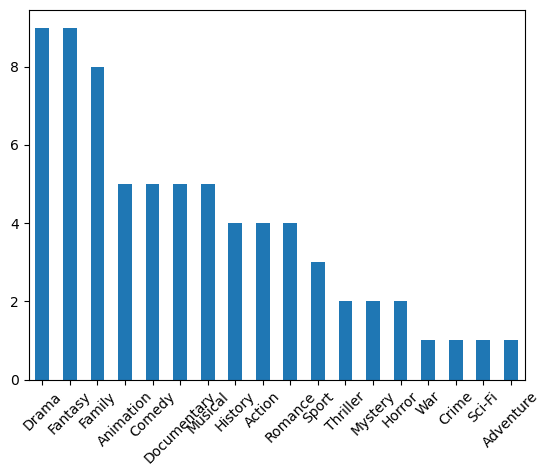

In [30]:
# Create a bar chart
counts.plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

## Conclusion

The top 5 gernes keywords are:
1. Drama, Fantasy
2. Family
3. Musical, Documentary, Animation, Comedy
4. History, Action, Romance
5. Sport


# END